Kabir Sawal - RA Task

1. In the first portion of the notebook, I compiled all tweets from the start of 2020 till the end of October, 2020 in order to capture each politician's tweet history leading up to the election. I then plotted a time series of their tweet densities to get an idea of how much each politician tweeted with respect to one-another. Predictably, Trump led the three quite dramatically. Harris and Biden remained relatively similar with the exception of two periods of time at the start of the timeseries and at the end. The first increase can likely be explained by the fact that Biden was the front-runner during the Democratic primary and his social outreach team was conducting a media blitz to lock in the nomination. The jump near the end of the axis likely has a similar motivation; reaching out to voters before the general election. 

2. In the second portion of the notebook, I parsed through the text of each politician's tweets and scrubbed out all of the punctuation. Then, I counted the total number of letters used by each as well as how many lower and upper case letters appeared across all their tweets. The results of this can be seen above. I did this because Trump is quite notorious for his use of capital letters in his tweets and I wanted to get an idea of how pervasive this is in his language. Looking at the raw amount of letters would not be meaningful, since Trump tweets far more than Biden or Harris, so I will be using ratios instead. The ratio of capital letters to total letters in Trump's tweets is 103284/780912 = 0.132, Biden's is 27539/448083 = 0.0615, and Harris' is 20470/324347 = 0.0631. As I predicted, Biden and Harris have a reasonable capital letter usage at around 6% of their total tweets. Trump uses capital letters at double the ratel; they make up for more than 13% of his total tweets. 

3. Given Trump's tweet frequency and use of capital letters, he is quite vocal on the platform. I would like to use this data to understand how effective Trump is at signaling his Republican base compared to Biden and Harris signaling their Democratic base. This can potentially be done by looking at the average tweet engagement as a proportion of each politicians total follower count.

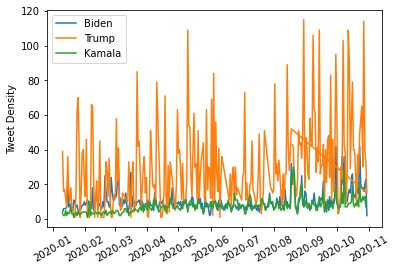

In [48]:
import pandas as pd
import bz2
import glob
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import string

biden_files = glob.glob("JoeBiden/*")
kamala_files = glob.glob("KamalaHarris/*")
trump_files = glob.glob("realDonaldTrump/*")

biden_tweets, kamala_tweets, trump_tweets = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
biden_tweets = pd.read_json(biden_files[0], compression = 'bz2',orient='records', lines=True)
kamala_tweets = pd.read_json(kamala_files[0], compression = 'bz2',orient='records', lines=True)

tt = []
tt.append(pd.read_json(trump_files[-1], compression = 'bz2',orient='records', lines=True))
tt.append(pd.read_json(trump_files[0], compression = 'bz2',orient='records', lines=True))

trump_tweets = pd.concat(tt, axis=0, ignore_index=True)

trump_day = {}
for tweet in trump_tweets.iterrows():  
    date = str(tweet[1]["created_at"])[:10]
    if date < '2020-01-1':
        continue
    date = datetime.strptime(date, '%Y-%m-%d')
    if date not in trump_day:
        trump_day[date] = 1
    elif date in trump_day:
        trump_day[date] += 1

biden_day = {}
for tweet in biden_tweets.iterrows():    
    date = str(tweet[1]["created_at"])[:10]
    if date < '2020-01-1':
        continue
    date = datetime.strptime(date, '%Y-%m-%d')
    if date not in biden_day:
        biden_day[date] = 1
    elif date in biden_day:
        biden_day[date] += 1
        
        
kamala_day = {}
for tweet in kamala_tweets.iterrows():    
    date = str(tweet[1]["created_at"])[:10]
    if date < '2020-01-1':
        continue
    date = datetime.strptime(date, '%Y-%m-%d')
    if date not in kamala_day:
        kamala_day[date] = 1
    elif date in kamala_day:
        kamala_day[date] += 1

        
x_1 = biden_day.keys()
y_1 = biden_day.values()
x_2 = trump_day.keys()
y_2 = trump_day.values()
x_3 = kamala_day.keys()
y_3 = kamala_day.values()


plt.ylabel('Tweet Density')
b = plt.plot(x_1,y_1, label='Biden')
t = plt.plot(x_2,y_2, label='Trump')
k = plt.plot(x_3,y_3, label='Kamala')
plt.legend(loc="upper left")
plt.xticks(rotation = 30)
plt.show()

In [54]:
import re
biden_words = {'total':0, 'lowc': 0, 'upc': 0}
for tweet in biden_tweets.iterrows():    
    date = str(tweet[1]["created_at"])[:10]
    if date < '2020-01-1':
        continue
    text = tweet[1]["full_text"]
    text = re.sub(r'[^\w\s]', '', text) 
    for letter in text:
        if letter != ' ' and not letter.isdigit():
            biden_words['total'] += 1
            if (letter.islower()):
                biden_words['lowc'] += 1
            if (letter.isupper()):
                biden_words['upc'] += 1
                
kamala_words = {'total':0, 'lowc': 0, 'upc': 0}
for tweet in kamala_tweets.iterrows():    
    date = str(tweet[1]["created_at"])[:10]
    if date < '2020-01-1':
        continue
    text = tweet[1]["full_text"]
    text = re.sub(r'[^\w\s]', '', text) 
    for letter in text:
        if letter != ' ' and not letter.isdigit():
            kamala_words['total'] += 1
            if (letter.islower()):
                kamala_words['lowc'] += 1
            if (letter.isupper()):
                kamala_words['upc'] += 1
                

trump_words = {'total':0, 'lowc': 0, 'upc': 0}
for tweet in trump_tweets.iterrows():    
    date = str(tweet[1]["created_at"])[:10]
    if date < '2020-01-1':
        continue
    text = tweet[1]["text"]
    try:
        text = re.sub(r'[^\w\s]', '', text) 
        for letter in text:
            if letter != ' ' and not letter.isdigit():
                trump_words['total'] += 1
                if (letter.islower()):
                    trump_words['lowc'] += 1
                if (letter.isupper()):
                    trump_words['upc'] += 1
    except:
        text = tweet[1]["full_text"]
        text = re.sub(r'[^\w\s]', '', text) 
        for letter in text:
            if letter != ' ' and not letter.isdigit():
                trump_words['total'] += 1
                if (letter.islower()):
                    trump_words['lowc'] += 1
                if (letter.isupper()):
                    trump_words['upc'] += 1

print(('In Biden\'s tweets starting in 2020, leading up to the election, he used {} letters, of which {} were uppercase and {} were lower case.').format(biden_words['total'], biden_words['upc'], biden_words['lowc']))
print(('In Kamala\'s tweets starting in 2020, leading up to the election, she used {} letters, of which {} were uppercase and {} were lower case.').format(kamala_words['total'], kamala_words['upc'], kamala_words['lowc']))
print(('In Trump\'s tweets starting in 2020, leading up to the election, he used {} letters, of which {} were uppercase and {} were lower case.').format(trump_words['total'], trump_words['upc'], trump_words['lowc']))

In Biden's tweets starting in 2020, leading up to the election, he used 448083 letters, of which 27539 were uppercase and 417591 were lower case.
In Kamala's tweets starting in 2020, leading up to the election, she used 324347 letters, of which 20470 were uppercase and 301481 were lower case.
In Trump's tweets starting in 2020, leading up to the election, he used 780912 letters, of which 103284 were uppercase and 673915 were lower case.
